In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [64]:
N,D,H=64,1000,100
x=tf.placeholder(tf.float32,shape=(N,D))
y=tf.placeholder(tf.float32,shape=(N,D))
w1=tf.placeholder(tf.float32,shape=(D,H))
w2=tf.placeholder(tf.float32,shape=(H,D))

h=tf.maximum(tf.matmul(x,w1),0)
y_pred=tf.matmul(h,w2)
diff=y_pred-y
loss=tf.reduce_mean(tf.reduce_sum(diff**2,axis=1))

grad_w1,grad_w2=tf.gradients(loss,[w1,w2])

with tf.Session()as sess:
    values={x:np.random.randn(N,D),
          w1:np.random.randn(D,H),
          w2:np.random.randn(H,D),
          y:np.random.randn(N,D)}
    out=sess.run([loss,grad_w1,grad_w2],feed_dict=values)
    loss_val,grad_w1_val,grad_w2_val=out
    print(out)

[51958080.0, array([[  5291.9136 ,    913.2901 ,  -1432.5343 , ...,  -1641.6511 ,
          7874.4697 ,   5342.004  ],
       [ -7818.6973 ,  -8426.961  ,  -7476.406  , ...,  -7452.366  ,
        -10946.797  ,   -315.71313],
       [ -6869.841  ,   2141.9255 ,    578.72406, ...,    835.76587,
         -5521.831  ,   1774.3229 ],
       ...,
       [  -656.7182 ,  -3619.9604 ,   -364.16537, ...,  -7929.143  ,
         -3203.9927 ,  -6209.8154 ],
       [ -1929.2501 ,  -6728.6025 ,   1795.2941 , ...,  -8684.954  ,
          3505.9285 ,   2607.5464 ],
       [  2590.2944 ,  -7097.2827 ,  -5243.4624 , ...,  -4888.6426 ,
         -1739.2368 ,  -9653.807  ]], dtype=float32), array([[ -968.0615  ,  3531.8354  , -1864.32    , ...,  5364.052   ,
         1976.5955  , -4806.1035  ],
       [ 1406.685   ,  2297.2175  , -1494.9253  , ...,  4345.6367  ,
         -744.386   , -3915.0151  ],
       [  701.0391  ,  2617.2683  ,    95.73752 , ...,  4195.905   ,
          450.7532  , -4064.5432  ],
    

[988.3517, array([[-0.50428647, -1.8799652 ,  1.6369721 , ...,  0.07390773,
        -1.4428189 , -0.37958604],
       [-1.4811566 , -0.711893  , -0.7554503 , ...,  0.44454086,
        -3.5548856 , -0.7260635 ],
       [-0.50069034, -2.9315357 , -1.3289449 , ..., -0.923193  ,
        -0.8915973 , -2.6981194 ],
       ...,
       [-0.12564151,  4.2328815 ,  1.6960962 , ...,  0.35908335,
         0.19227667,  2.5290263 ],
       [ 0.5882663 ,  2.2232893 ,  3.5520844 , ...,  0.9140872 ,
        -0.772231  ,  1.6114781 ],
       [-0.78951883,  3.0494368 ,  5.1736026 , ..., -0.22632068,
        -0.7411021 ,  2.4951215 ]], dtype=float32), array([[-0.00253897, -0.00286479,  0.00597043, ..., -0.00577776,
         0.0033747 , -0.00096672],
       [-0.00673246,  0.00732226,  0.01396788, ...,  0.01416834,
         0.00161245, -0.00618638],
       [-0.00603699,  0.01466401,  0.01537789, ...,  0.01094791,
         0.00909456, -0.00357996],
       ...,
       [-0.00212431,  0.00046642,  0.01156377, .

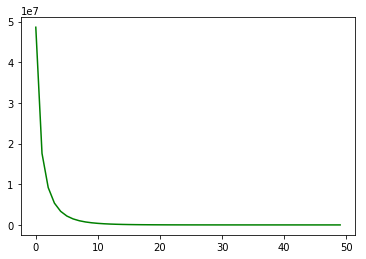

48614130.0 990.50867


In [56]:
N,D,H=64,1000,100
x=tf.placeholder(tf.float32,shape=(N,D))
y=tf.placeholder(tf.float32,shape=(N,D))
w1=tf.placeholder(tf.float32,shape=(D,H))
w2=tf.placeholder(tf.float32,shape=(H,D))

h=tf.maximum(tf.matmul(x,w1),0)
y_pred=tf.matmul(h,w2)
diff=y_pred-y
loss=tf.reduce_mean(tf.reduce_sum(diff**2,axis=1))

grad_w1,grad_w2=tf.gradients(loss,[w1,w2])

with tf.Session()as sess:
    values={x:np.random.randn(N,D),
          w1:np.random.randn(D,H),
          w2:np.random.randn(H,D),
          y:np.random.randn(N,D)}
    print(out)
    loss_summery=[]
    learning_rate=1e-5
    for t in range(50):
        out=sess.run([loss,grad_w1,grad_w2],feed_dict=values)
        loss_val,grad_w1_val,grad_w2_val=out
        values[w1]-=learning_rate*grad_w1_val
        values[w2]-=learning_rate*grad_w2_val
        loss_summery.append(loss_val)
    plt.plot(range(50),loss_summery,'g-',label='loss_value')
    plt.show()
    print(loss_summery[0],loss_summery[50-1])

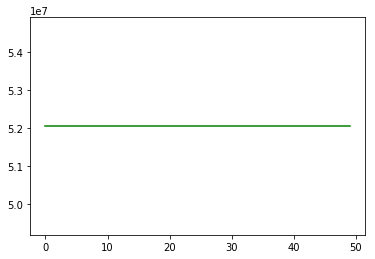

[52045190.0] [52045190.0]


In [57]:
N,D,H=64,1000,100
x=tf.placeholder(tf.float32,shape=(N,D))
y=tf.placeholder(tf.float32,shape=(N,D))
w1=tf.Variable(tf.random_normal((D,H)))
w2=tf.Variable(tf.random_normal((H,D)))

h=tf.maximum(tf.matmul(x,w1),0)
y_pred=tf.matmul(h,w2)
diff=y_pred-y
loss=tf.reduce_mean(tf.reduce_sum(diff**2,axis=1))

grad_w1,grad_w2=tf.gradients(loss,[w1,w2])

learning_rate=1e-5
new_w1=w1.assign(w1-learning_rate*grad_w1)
new_w2=w2.assign(w2-learning_rate*grad_w2)
               
with tf.Session()as sess:
    sess.run(tf.global_variables_initializer())
    values={x:np.random.randn(N,D),
            y:np.random.randn(N,D)}
    
    learning_rate=1e-5
    loss_summery=[]
    for t in range(50):
        loss_val=sess.run([loss],feed_dict=values)
        loss_summery.append(loss_val)
    plt.plot(range(50),loss_summery,'g-',label='loss_value')
    plt.show()
    print(loss_summery[0],loss_summery[50-1])

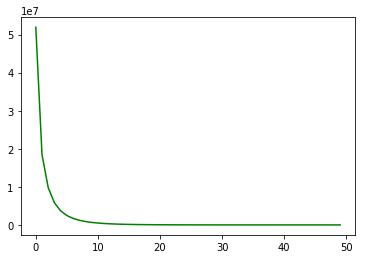

51927356.0 1124.9626


In [58]:
N,D,H=64,1000,100
x=tf.placeholder(tf.float32,shape=(N,D))
y=tf.placeholder(tf.float32,shape=(N,D))
w1=tf.Variable(tf.random_normal((D,H)))
w2=tf.Variable(tf.random_normal((H,D)))

h=tf.maximum(tf.matmul(x,w1),0)
y_pred=tf.matmul(h,w2)
diff=y_pred-y
loss=tf.reduce_mean(tf.reduce_sum(diff**2,axis=1))

grad_w1,grad_w2=tf.gradients(loss,[w1,w2])

learning_rate=1e-5
new_w1=w1.assign(w1-learning_rate*grad_w1)
new_w2=w2.assign(w2-learning_rate*grad_w2)
updates=tf.group(new_w1,new_w2)               
    
with tf.Session()as sess:
    sess.run(tf.global_variables_initializer())
    values={x:np.random.randn(N,D),
            y:np.random.randn(N,D)}
    
    learning_rate=1e-5
    loss_summery=[]
    for t in range(50):
        loss_val,_=sess.run([loss,updates],feed_dict=values)
        loss_summery.append(loss_val)
    plt.plot(range(50),loss_summery,'g-',label='loss_value')
    plt.show()
    print(loss_summery[0],loss_summery[50-1])

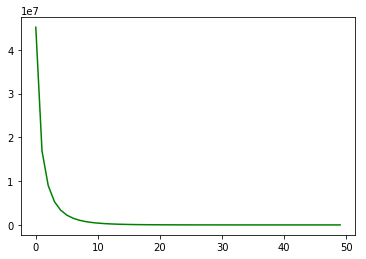

45169750.0 1014.485


In [60]:
N,D,H=64,1000,100
x=tf.placeholder(tf.float32,shape=(N,D))
y=tf.placeholder(tf.float32,shape=(N,D))
w1=tf.Variable(tf.random_normal((D,H)))
w2=tf.Variable(tf.random_normal((H,D)))

h=tf.maximum(tf.matmul(x,w1),0)
y_pred=tf.matmul(h,w2)
diff=y_pred-y
loss=tf.reduce_mean(tf.reduce_sum(diff**2,axis=1))

optimizer=tf.train.GradientDescentOptimizer(1e-5)
updates=optimizer.minimize(loss)

grad_w1,grad_w2=tf.gradients(loss,[w1,w2])              
    
with tf.Session()as sess:
    sess.run(tf.global_variables_initializer())
    values={x:np.random.randn(N,D),
            y:np.random.randn(N,D)}
    
    #loss=[]
    loss_summery=[]
    for t in range(50):
        loss_val,_=sess.run([loss,updates],feed_dict=values)
        loss_summery.append(loss_val)
    plt.plot(range(50),loss_summery,'g-',label='loss_value')
    plt.show()
    print(loss_summery[0],loss_summery[50-1])

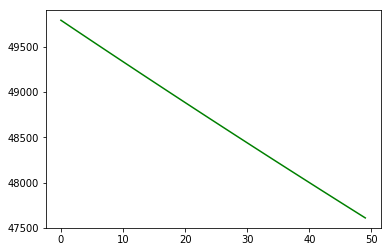

49791.492 47609.445


In [61]:
N,D,H=64,1000,100
x=tf.placeholder(tf.float32,shape=(N,D))
y=tf.placeholder(tf.float32,shape=(N,D))
w1=tf.Variable(tf.random_normal((D,H)))
w2=tf.Variable(tf.random_normal((H,D)))

h=tf.maximum(tf.matmul(x,w1),0)
y_pred=tf.matmul(h,w2)
loss=tf.losses.mean_squared_error(y_pred,y)

optimizer=tf.train.GradientDescentOptimizer(1e-5)
updates=optimizer.minimize(loss)

grad_w1,grad_w2=tf.gradients(loss,[w1,w2])              
    
with tf.Session()as sess:
    sess.run(tf.global_variables_initializer())
    values={x:np.random.randn(N,D),
            y:np.random.randn(N,D)}
    
    loss_summery=[]
    for t in range(50):
        loss_val,_=sess.run([loss,updates],feed_dict=values)
        loss_summery.append(loss_val)
    plt.plot(range(50),loss_summery,'g-',label='loss_value')
    plt.show()
    print(loss_summery[0],loss_summery[50-1])

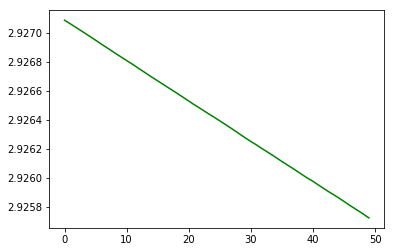

2.9270847 2.9257226


In [62]:
N,D,H=64,1000,100
x=tf.placeholder(tf.float32,shape=(N,D))
y=tf.placeholder(tf.float32,shape=(N,D))

init=tf.variance_scaling_initializer(2.0)
h=tf.layers.dense(inputs=x,units=H,
                activation=tf.nn.relu,kernel_initializer=init)
y_pred=tf.layers.dense(inputs=h,units=D,
                     kernel_initializer=init
                     )
loss=tf.losses.mean_squared_error(y_pred,y)

optimizer=tf.train.GradientDescentOptimizer(1e-5)
updates=optimizer.minimize(loss)             
    
with tf.Session()as sess:
    sess.run(tf.global_variables_initializer())
    values={x:np.random.randn(N,D),
            y:np.random.randn(N,D)}
    
    loss_summery=[]
    for t in range(50):
        loss_val,_=sess.run([loss,updates],feed_dict=values)
        loss_summery.append(loss_val)
    plt.plot(range(50),loss_summery,'g-',label='loss_value')
    plt.show()
    print(loss_summery[0],loss_summery[50-1])